In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

# Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= \beta_1 X_1+\varepsilon_y$$
$$X_2=\beta_2Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The linear regression model is equivariant.

The invariant loss function is $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$.

## Compute the estimated coefficients with X1, X2 and (X1, X2)

In [2]:
#Define coefficient function for y=beta_1 x1
def coef_1(n,sigma,g1,beta1,beta2):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1
    Y=beta1*X1+np.random.normal(0,sigma, n)
    X2=beta2*Y+np.random.normal(0, 1, n)
    X=np.hstack([X1.reshape(-1,1)])
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  #fit the linear regression with only X1
    return np.append(reg.coef_,reg.intercept_)

In [3]:
#Define coefficient function for y=beta_2 x2
def coef_2(n,sigma,g2,beta1,beta2):
    X1=np.random.normal(0, sigma, n)
    Y=beta1*X1+np.random.normal(0,sigma, n)
    X2=beta2*Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X2.reshape(-1,1)]) #fit the linear regression with only X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [4]:
#Define coefficient function for y=beta_1 x1+beta_2 x2
def coef_12(n,sigma,g1,g2,beta1,beta2):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1(for X1)
    Y=beta1*X1+np.random.normal(0,sigma, n)
    X2=beta2*Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)]) #fit the linear regression with X1 and X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

## Risk functions of shifting X1, X2 and (X1,X2) with three estimated coefficients 

In [55]:
# risk function of shifting on X1, estimating with X1
def risk_function1_1(n1,n2,sigma,a,iterate,g1,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+a #intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        #X2=Y+np.random.normal(0, 1, n)
        #X=np.hstack([X1.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_1(n1,sigma,g1,beta1,beta2)[0]+coef_1(n1,sigma,g1,beta1,beta2)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return np.append(sum(list0)/(iterate),np.std(pred))

In [56]:
# risk function of shifting on X2, estimating with X1
def risk_function2_1(n1,n2,sigma,b,iterate,g1,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2) #intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=beta2*Y+np.random.normal(0, 1, n2)+b
        #X=np.hstack([X1.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_1(n1,sigma,g1,beta1,beta2)[0]+coef_1(n1,sigma,g1,beta1,beta2)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return np.append(sum(list0)/(iterate),np.std(pred))

In [57]:
# risk function of shifting on X1 and X2, estimating with X1 
def risk_function12_1(n1,n2,sigma,x,iterate,g1,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+ x[0]#intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=Y+np.random.normal(0, 1, n2)+x[1]
        pred=X1*coef_1(n1,sigma,g1,beta1,beta2)[0]+coef_1(n1,sigma,g1,beta1,beta2)[1]  #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return np.append(sum(list0)/(iterate),np.std(pred))


In [58]:
# risk function of shifting on X1, estimating with X2
def risk_function1_2(n1,n2,sigma,a,iterate,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+a
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=Y+np.random.normal(0, 1, n2) #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n1,sigma,g2,beta1,beta2)[0]+coef_2(n1,sigma,g2,beta1,beta2)[1]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2)  
    return np.append(sum(list0)/(iterate),np.std(pred))

In [59]:
# risk function of shifting on X2, estimating X2
def risk_function2_2(n1,n2,sigma,b,iterate,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2) 
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=Y+np.random.normal(0, 1, n2)+b #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n1,sigma,g2,beta1,beta2)[0]+coef_2(n1,sigma,g2,beta1,beta2)[1]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2)  
    return np.append(sum(list0)/(iterate),np.std(pred))

In [60]:
# risk function of shifting on X1 and X2, estimating X2
def risk_function12_2(n1,n2,sigma,x,iterate,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+x[0]
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=beta2*Y+np.random.normal(0, 1, n2)+x[1] #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n1,sigma,g2,beta1,beta2)[0]+coef_2(n1,sigma,g2,beta1,beta2)[1] #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2)  
    return np.append(sum(list0)/(iterate),np.std(pred))

In [61]:
# risk function of shifting on X1, estimating with X1 and X2
def risk_function1_12(n1,n2,sigma,x,iterate,g1,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+x[0] #intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=beta2*Y+np.random.normal(0, 1, n2) #intervention on X2
        X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=pred=X1*coef_12(n1,sigma,g1,g2,beta1,beta2)[0]+X2*coef_12(n1,sigma,g1,g2,beta1,beta2)[1]+coef_12(n1,sigma,g1,g2,beta1,beta2)[2] #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return sum(list0)/(iterate)

In [62]:
# risk function of shifting on X2, estimating with X1 and X2
def risk_function2_12(n1,n2,sigma,x,iterate,g1,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2) #intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=beta2*Y+np.random.normal(0, 1, n2)+x[1] #intervention on X2
        X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=pred=X1*coef_12(n1,sigma,g1,g2,beta1,beta2)[0]+X2*coef_12(n1,sigma,g1,g2,beta1,beta2)[1]+coef_12(n1,sigma,g1,g2,beta1,beta2)[2] #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return sum(list0)/(iterate)

In [63]:
# risk function of shifting on X1 and X2, estimating with X1 and X2
def risk_function12_12(n1,n2,sigma,x,iterate,g1,g2,beta1,beta2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n2)+x[0] #intervention on X1
        Y=beta1*X1+np.random.normal(0,sigma, n2)
        X2=beta2*Y+np.random.normal(0, 1, n2)+x[1] #intervention on X2
        X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=pred=X1*coef_12(n1,sigma,g1,g2,beta1,beta2)[0]+X2*coef_12(n1,sigma,g1,g2,beta1,beta2)[1]+coef_12(n1,sigma,g1,g2,beta1,beta2)[2] #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n2) 
    return sum(list0)/(iterate)

# Estimating by X1 with shifting X1, X2 and (X1,X2)

In [64]:
def plot_estimated_X1(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]

    a=np.linspace(0., 20., 30)
    b=np.linspace(0., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])
    


    for a in np.linspace(0., 20., 30): #different environments on X1
        list1.append(risk_function1_1(1000,100,1,a, 11,0,beta1,beta2)[0])
    

    for b in np.linspace(0., 20., 30): #different environments on X1
        list2.append(risk_function2_1(1000,100,1,b, 11,0,beta1,beta2)[0])  


    for i in range(30): #different environments on (X1,X2)
        list3.append(risk_function12_1(1000,100,1,m[i],11,0,0,beta1,beta2)[0])

    plt.figure(figsize=(10,7))

    N = 30

    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)

    classes = ['shifting on X1', 'Shifting on X2', 'Shifting on X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

    #plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 
    

## beta1=1, beta2=1

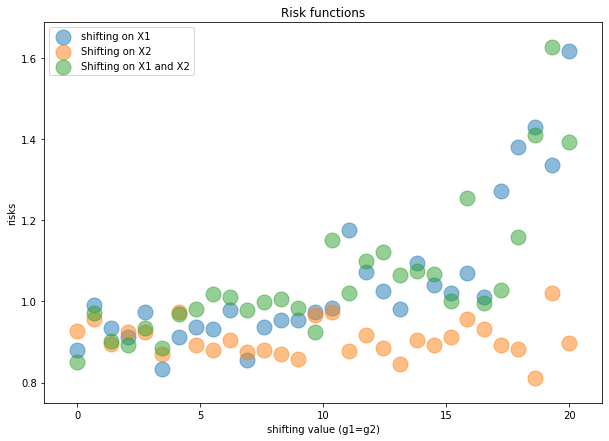

In [65]:
plot_estimated_X1(1,1)

## beta1=1, beta2=10

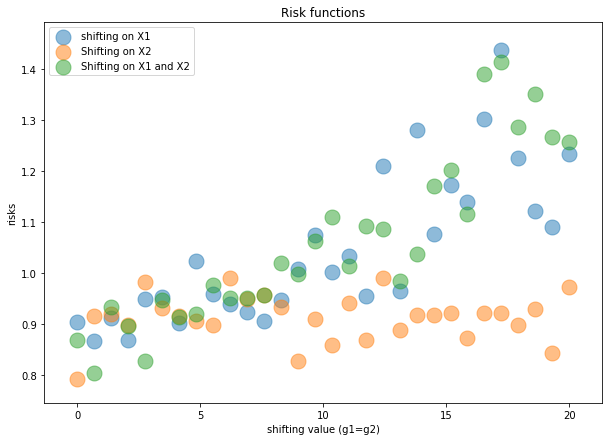

In [66]:
plot_estimated_X1(10,10)

## beta1=10, beta2=100

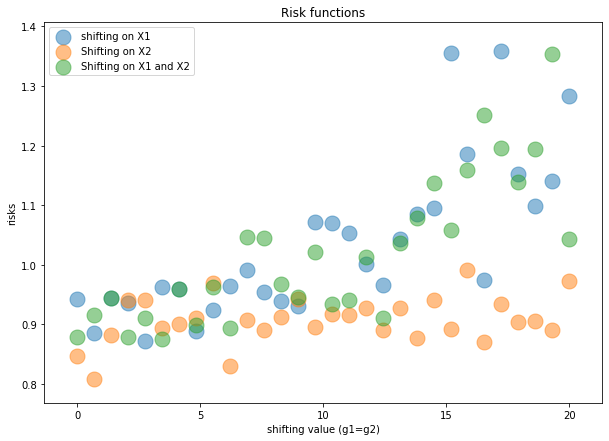

In [67]:
plot_estimated_X1(100,100)

## Estimating by X2 with shifting X1, X2 and (X1,X2)

In [68]:
def plot_estimated_X2(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]

    a=np.linspace(0., 20., 30)
    b=np.linspace(0., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


    for a in np.linspace(0., 20., 30): #different environments on X1
        list1.append(risk_function1_2(1000,100,1,a, 11,0,beta1,beta2)[0])
    

    for b in np.linspace(0., 20., 30): #different environments on X1
        list2.append(risk_function2_2(1000,100,1,b, 11,0,beta1,beta2)[0])  


    for i in range(30): #different environments on (X1,X2)
        list3.append(risk_function12_2(1000,100,1,m[i],11,0,beta1,beta2)[0])

    plt.figure(figsize=(10,7))

    N = 30
    
    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)

    classes = ['shifting on X1', 'Shifting on X2', 'Shifting on X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

#plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 

## beta1=1, beta2=1

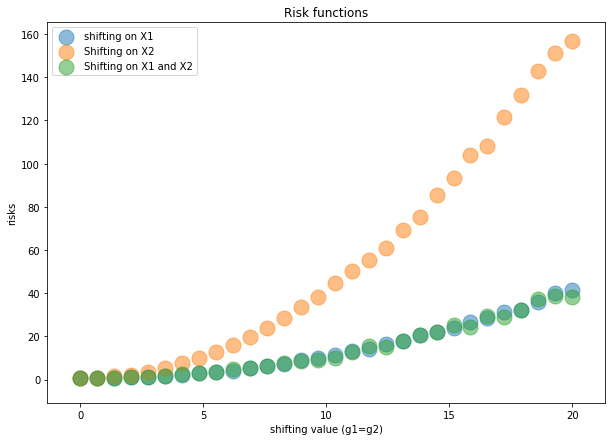

In [69]:
plot_estimated_X2(1,1)

beta1=1, beta2=10

## beta1=10, beta2=10

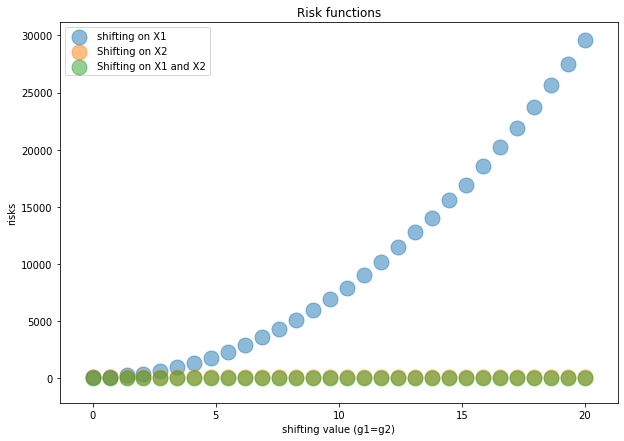

In [70]:
plot_estimated_X2(10,10)

## beta1=100, beta2=100

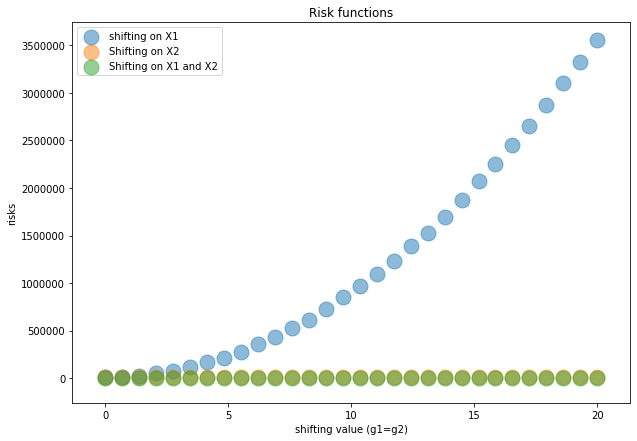

In [71]:
plot_estimated_X2(100,100)

## Estimating by X1 and X2 with shifting X1, X2 and (X1,X2)

In [72]:
def plot_estimated_X1_X2(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]

    a=np.linspace(10., 20., 30)
    b=np.linspace(10., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])

    for i in range(30): #different environments on (X1,X2)
        list1.append(risk_function1_12(1000,100,1,m[i],11,0,0,beta1,beta2))  


    for j in range(30): #different environments on (X1,X2)
        list2.append(risk_function2_12(1000,100,1,m[j],11,0, 0,beta1,beta2))
    
    for k in range(30): #different environments on (X1,X2)
        list3.append(risk_function12_12(1000,100,1,m[k],11,0,0,beta1,beta2))

    plt.figure(figsize=(10,7))

    N = 30

    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)

    classes = ['shifting on X1', 'Shifting on X2', 'Shifting on X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

    #plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 
    

## beta1=1, beta2=1

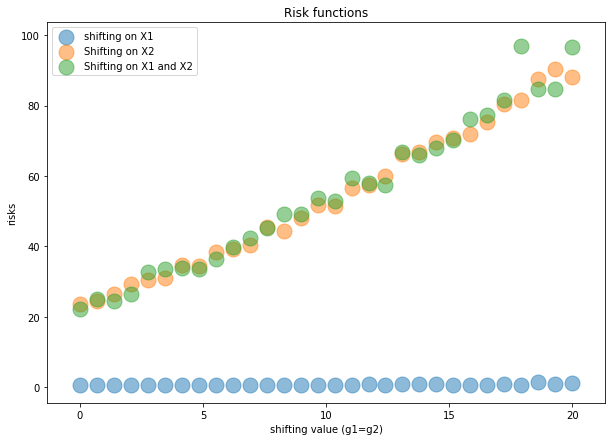

In [73]:
plot_estimated_X1_X2(1,1)

## beta1=10, beta2=10

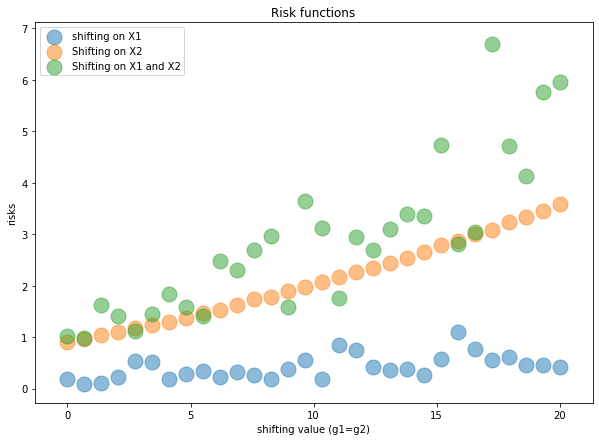

In [74]:
plot_estimated_X1_X2(10,10)

## beta1=100, beta2=100

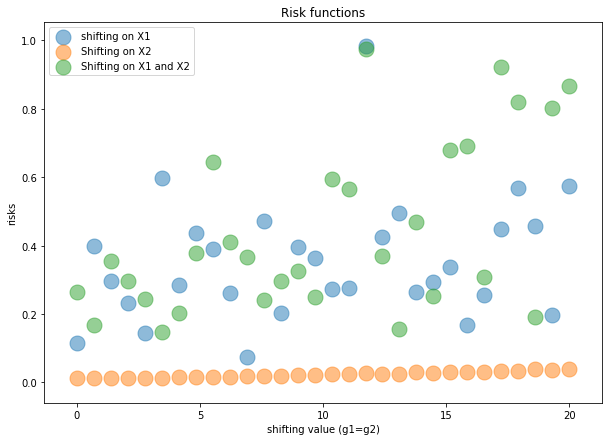

In [75]:
plot_estimated_X1_X2(100,100)

## Shift only X1

In [111]:
def shift_X1(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]
    a=np.linspace(0., 20., 30)
    b=np.linspace(0., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


    for a in np.linspace(0., 20., 30): #different environments on X1
        list1.append(risk_function1_1(1000,100,1,a, 10,0,beta1,beta2)[0])
    


    for b in np.linspace(0., 20., 30): #different environments on X1
        list2.append(risk_function1_2(1000,100,1,b, 10,0,beta1,beta2)[0])  
   
    for i in range(30): #different environments on (X1,X2)
        list3.append(risk_function1_12(1000,100,1,m[i],10,0,0,beta1,beta2))


    

    plt.figure(figsize=(10,7))

    N = 30

    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)
    classes = ['Estimate/predicted with X1', 'Estimate/predicted with X2','Estimate/predicted with X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

    #plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 

## beta1=1, beta2=1

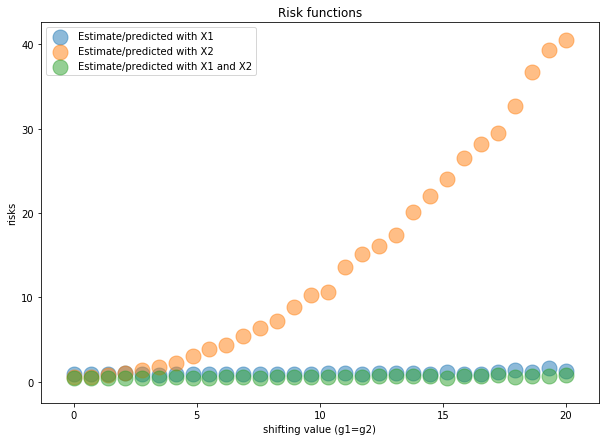

In [112]:
shift_X1(1,1)

shift X1/X2/X1,X1 **only**

## beta1=10, beta2=10

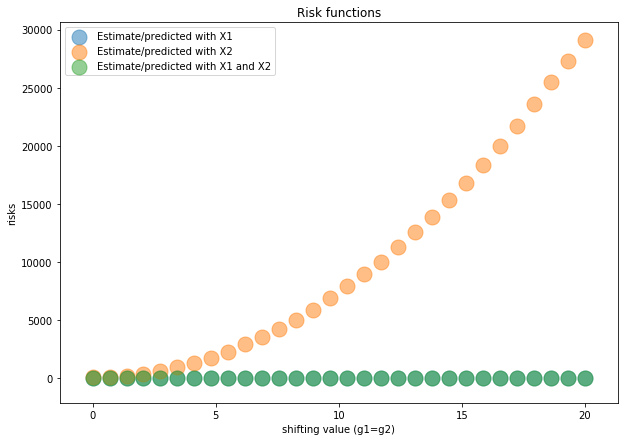

In [113]:
shift_X1(10,10)

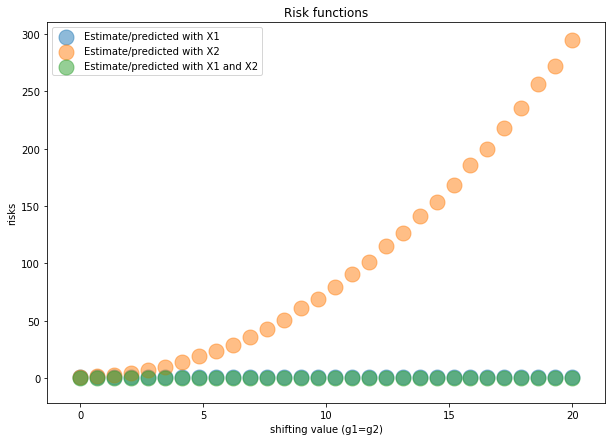

In [114]:
shift_X1(1,10)

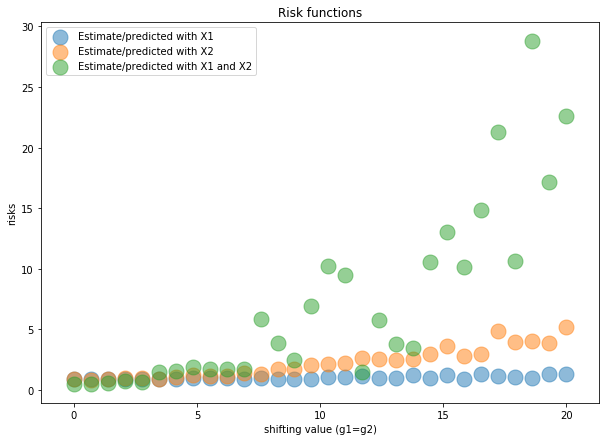

In [115]:
shift_X1(10,1)

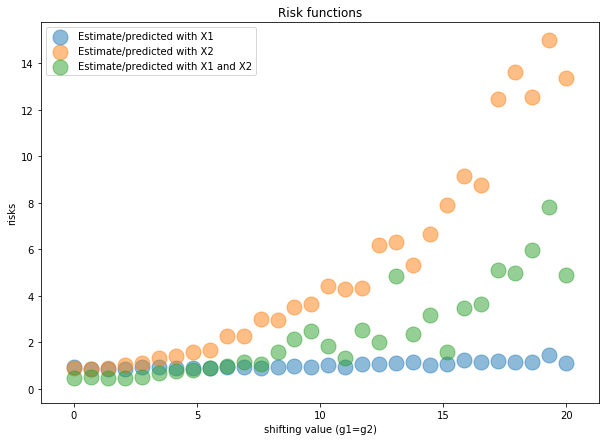

In [116]:
shift_X1(5,1)

## Shift only X2

In [117]:
def shift_X2(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]
    a=np.linspace(0., 20., 30)
    b=np.linspace(0., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


    for a in np.linspace(0., 20., 30): #different environments on X1
        list1.append(risk_function2_1(1000,100,1,a, 10,0,beta1,beta2)[0])
    


    for b in np.linspace(0., 20., 30): #different environments on X1
        list2.append(risk_function2_2(1000,100,1,b, 10,0,beta1,beta2)[0])  
   
    for i in range(30): #different environments on (X1,X2)
        list3.append(risk_function2_12(1000,100,1,m[i],10,0,0,beta1,beta2))


    

    plt.figure(figsize=(10,7))

    N = 30

    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)
    classes = ['Estimate/predicted with X1', 'Estimate/predicted with X2','Estimate/predicted with X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

    #plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 

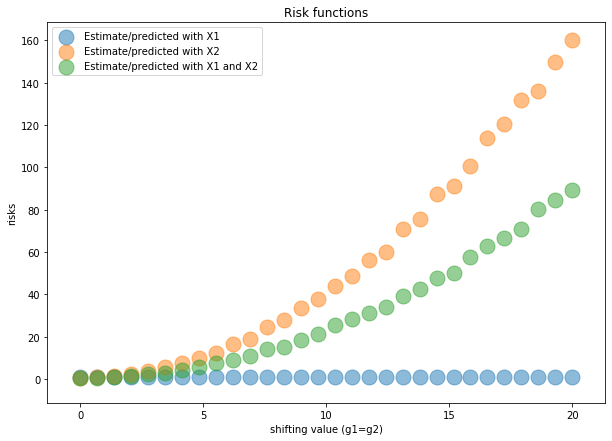

In [118]:
shift_X2(1,1)

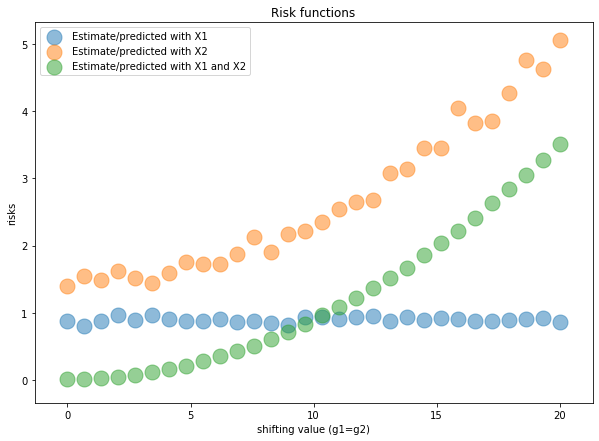

In [119]:
shift_X2(1,10)

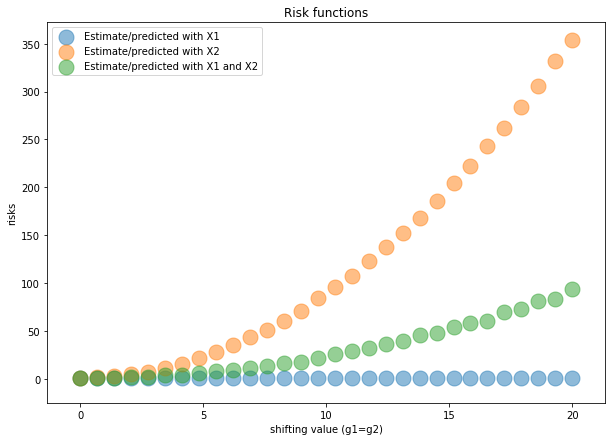

In [120]:
shift_X2(10,1)

## Shift  X1 and X2

In [129]:
def shift_X12(beta1,beta2):
    list1=[]
    list2=[]
    list3=[]
    a=np.linspace(0., 20., 30)
    b=np.linspace(0., 20., 30)
    m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


    for i in range(30): #different environments on X1
        list1.append(risk_function12_1(1000,100,1,m[i], 10,0,0,beta1,beta2)[0])
    


    for j in range(30): #different environments on X1
        list2.append(risk_function12_2(1000,100,1,m[j],10,0,beta1,beta2)[0])  
   
    for k in range(30): #different environments on (X1,X2)
        list3.append(risk_function12_12(1000,100,1,m[k],10,0,0,beta1,beta2))


    

    plt.figure(figsize=(10,7))

    N = 30

    colors = np.random.rand(N)
    area = (30 * 0.5)**2 
    plt.scatter(np.linspace(0., 20., 30), list1, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list2, s=area, alpha=0.5)
    plt.scatter(np.linspace(0., 20., 30), list3, s=area, alpha=0.5)
    classes = ['Estimate/predicted with X1', 'Estimate/predicted with X2','Estimate/predicted with X1 and X2']
    plt.legend(labels=classes)
    plt.xlabel("shifting value (g1=g2)")
    plt.ylabel("risks")

    #plt.legend(loc='best')
    plt.title("Risk functions") 
    plt.show() 

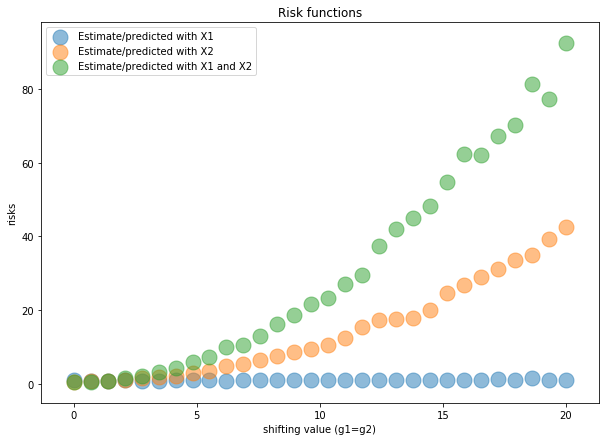

In [131]:
shift_X12(1,1)